<div style="background-color: #212946; padding: 10px; color: #F62196; text-align: right;">

<b>*Zacharia Schmitz, Junior Data Scientist*</b>

<div style="background-color: #212946; padding: 10px; color: #F62196; text-align: center;">

# <b>**Project Telco Churn**</b>

*Discover drivers of churn in Telco customers*

***

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

## <font color='#F62196'><i>**Plan**</i></font> → Acquire → Prepare → Explore → Model → Deliver

<font color='#F62196'>The plan is to use the drivers that we discover in machine learning models.</font>

* Discover drivers of churn in Telco customers

* Use drivers to develop machine learning models to predict a customer leaving

#### **Imports**

In [1]:
import prepare as p
import explore as e
import model as m

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">
 
## Plan → <font color='#F62196'><i>**Acquire**</i></font> → Prepare → Explore → Model → Deliver

<font color='#F62196'>In acquisition we use a function to either use a CSV or utilize MySQL Database to pull the data.</font>

In [19]:
# Get the data from CSV or MySQL server
telco = p.get_telco_data()

CSV Found


<div style="background-color: #212946; padding: 10px; color: #18C0C4;">
 
## Plan → Acquire → <font color='#F62196'><i>**Prepare**</i></font> → Explore → Model → Deliver

<font color='#F62196'>Preparation wasn't too bad with the relatively clean dataset. Only 2 features had null values we had to correct. We filled the nulls in internet_service with no internet service, and we changed the 9 blank values in total_charges to 0 because their tenure was at 0 as well. The rest of the changes were just formating and didn't change any data. In depth formatting details are in the README.

Then our train validate test split is roughly a 60 / 20 / 20 split</font>

In [20]:
p.check_columns(telco)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values
20,churn,2,"[No, Yes]",0
1,gender,2,"[Female, Male]",0
2,senior_citizen,2,"[0, 1]",0
3,partner,2,"[Yes, No]",0
4,dependents,2,"[Yes, No]",0
24,internet_service_type,2,"[DSL, Fiber optic, nan]",1526
6,phone_service,2,"[Yes, No]",0
16,paperless_billing,2,"[Yes, No]",0
22,contract_type,3,"[One year, Month-to-month, Two year]",0
15,contract_type_id,3,"[2, 1, 3]",0


### <b>Data Assumptions Made *(Null Value Handling)*:</b>

- Filled all `Null` in `internet_service_type` with what the rest of the table uses; `No internet service`

- Nine `Null` in `total_charges` were converted to 0, due to their tenure being at 0 as well

- All other changes were only formatting or to use clearer language.

In [3]:
# Using prep_telco(), we'll apply all of the changes.

telco = p.prep_telco(telco)

In [4]:
# From this DataFrame, we'll do our split to begin exploration on our train set

train, validate, test = p.split_telco(telco)

train: 3943 (56% of 7043)
validate: 1691 (24% of 7043)
test: 1409 (20% of 7043)


<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

## Plan → Acquire → Prepare → <font color='#F62196'><i>**Explore**</i></font> → Model → Deliver

<font color='#F62196'>In explore we'll move into the statistical testing. We determined these by doing large blanke visuals first, and picking out the outliers</font>

---

### **Statistical Hypothesis Testing**

paperless_billing & churn

Chi2: 139.79410540967487
P-value: 3.124092543429234e-29
Degrees of Freedom: 4


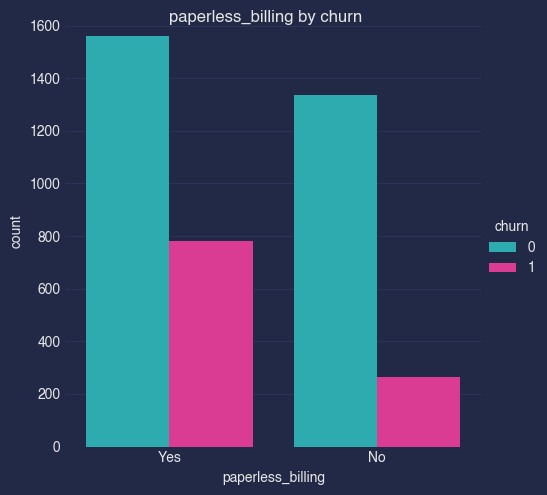

In [5]:
# Use explore_categorical to run a Chi2 test and plot the target against a variable.
e.explore_categorical(train, 'churn', 'paperless_billing')

### **1. <i>Is `churn` independent from `paperless_billing`?</i>**
<i> Discrete (`churn`) vs Discrete (`paperless_billing`) = $Chi^2$ </i>

* $H_0$: `churn` is independent from `paperless_billing`

* $H_a$: `churn` is **NOT** independent from `paperless_billing`

* α = 0.05

    - $Chi^2$ = 139.79
    - $p$ = 3.124092543429234e-29
    - $p$  <  α

### <b> <u> We reject the null hypothesis. </u> </b>

---

payment_type & churn

Chi2: 354.5801312481015
P-value: 9.53178254900431e-72
Degrees of Freedom: 8


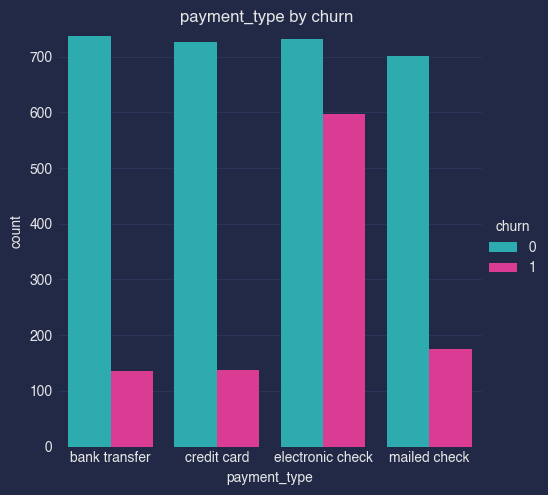

In [6]:
# Use explore_categorical using train data to run Chi2 and plot
e.explore_categorical(train, 'churn', 'payment_type')

### **2. Is `churn` independent from `payment_type`?**
Discrete (`churn`) vs Discrete (`payment_type`) = $Chi^2$

* $H_0$: `churn` is independent from `payment_type`

* $H_a$: `churn` is **NOT** independent from `payment_type`

* α = 0.05

    - $Chi^2$ = 354.5801312481015
    - $p$ = 9.53178254900431e-72

### <b> <u> We reject the null hypothesis. </u> </b>

---

internet_service_type & churn

Chi2: 397.7388778433559
P-value: 8.56197034878799e-83
Degrees of Freedom: 6


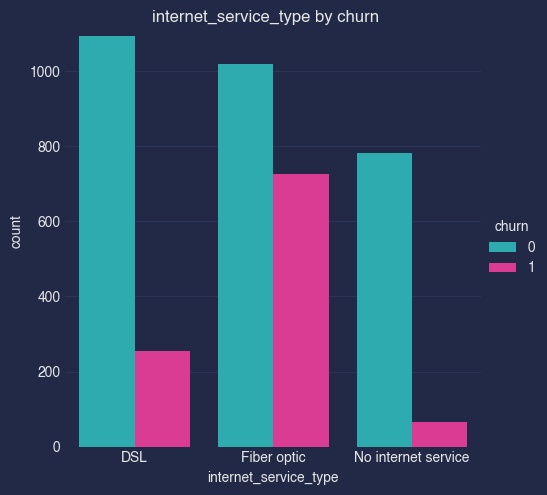

In [7]:
# Use explore_categorical using train data to run Chi2 and plot
e.explore_categorical(train, 'churn', 'internet_service_type')

### **3. Is there a difference in `churn` based on `internet_service_type`?**
Discrete (`churn`) vs Discrete (`internet_service_type`) = $Chi^2$

* $H_0$: `churn` is independent from `internet_service_type`

* $H_a$: `churn` is **NOT** independent from `internet_service_type`

* α = 0.05

    - $Chi^2$ = 397.7388778433559
    - $p$ = 8.56197034878799e-83
    - $p$  <  α

### <b> <u>We reject the null hypothesis. </u> </b>

---

Mann-Whitney Test:
Stat = 1873167.0
P-Value = 7.841086672350971e-30


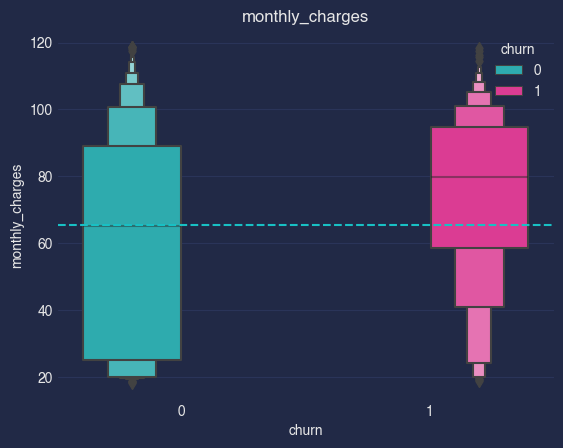

In [8]:
# Use explore_bivariate_quant using train data to run Mann-Whitney and plot
e.explore_bivariate_quant(train,'churn','monthly_charges')


### **4. Is `churn` independent from `monthly_charges`?**
Discrete (`churn`) vs Continuous (`monthly_charges`) = $Mann$-$Whitney$ $U$

* $H_0$: There is **NO** difference in `churn` based on `monthly_charges`

* $H_a$: There is a difference in `churn` based on `monthly_charges`

* α = 0.05

    - $Mann$-$Whitney$ $U$ statistic = 1873167.0
    - $p$ = 7.841086672350971e-30
    - $p$  <  α

### <b> <u> We reject the null hypothesis. </u> </b>

---

tech_support & churn

Chi2: 421.94530638077975
P-value: 5.336791404828166e-88
Degrees of Freedom: 6


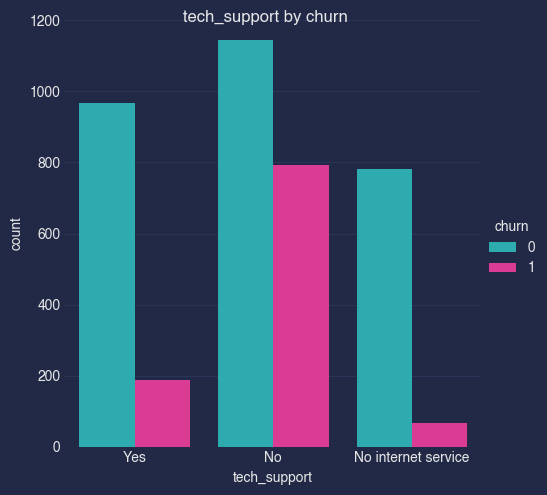

In [9]:
# Use explore_categorical using train data to run Chi2 and plot
e.explore_categorical(train, 'churn', 'tech_support')

### **5. Is `churn` independent from `tech_support`?**
Discrete (`churn`) vs Discrete (`tech_support?`) = $Chi^2$

* $H_0$: There is **NO** difference in `churn` based on `tech_support`

* $H_a$: There is a difference in `churn` based on `tech_support`

    - $Chi^2$ = 421.94530638077975
    - $p$ = 5.336791404828166e-88
    - $p$  <  α

    ### <b> <u> We reject the null hypothesis. </u> </b>

#### **After visual exploration of the bivariate and multivariate data, we determined some drivers of `churn` are:**

- `paperless_billing` *- being enrolled in this appears to churn more*

- `fiber_optic_internet` *- customers with fiber optic internet appear to churn more*

- `e_check_payment` *- customers paying with an electronic_check appear to churn more*

- `monthly_charges` *- higher monthly among members that churn*

- `tech_support` *- those without support, tend to churn*

In [10]:
# Set the features for the models

features = ['monthly_charges',
            'paperless_billing',
            'e_check_payment',
            'fiber_optic_internet',
            'tech_support',
            'senior_citizen',
            'month_to_month_contract',
            'tenure_years',
            'total_charges',
            'monthly_charges',
            'device_protection']

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

## Plan → Acquire → Prepare → Explore → <font color='#F62196'><i>**Model**</i></font> → Deliver

<font color='#F62196'>With some features identified, we'll move onto modeling. Accuracy is going to be the evaluation metric. Our baseline will be 73%, assuming no churn.</font>

* Accuracy will be the evaluation metric
<pre>
        <u>     TP + TN     </u>
        TP + TN + FP + FN
</pre>

* Guessing `no_churn` for every customer gives an accuracy of 73%

    - 73% will be the baseline accuracy

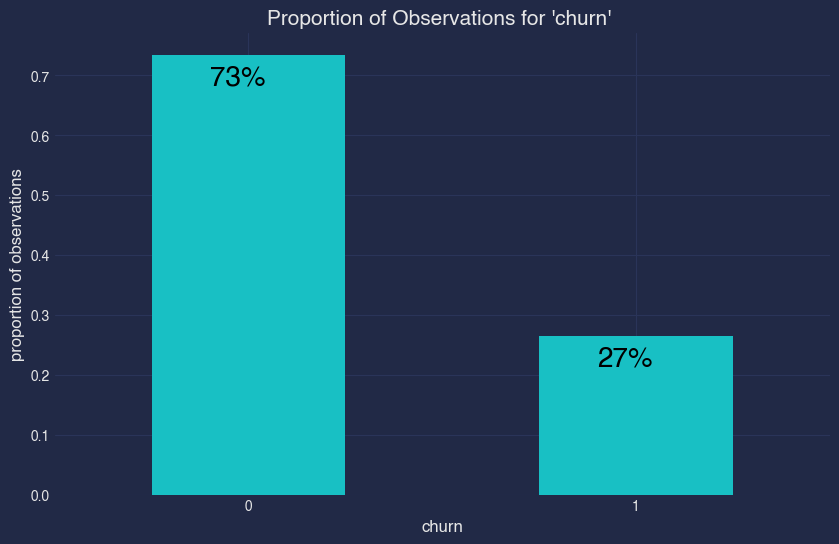

In [11]:
# Use telco_ml to convert to binary and normalize data, then split

train = p.telco_ml(train)
validate = p.telco_ml(validate)
test = p.telco_ml(test)

# Establish the baseline

m.plot_churn_proportion(train)

In [12]:
# Create X and y splits

X_train, y_train, X_validate, y_validate, X_test, y_test = m.create_train_validate_test(train, validate, test, 'churn')

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

### <font color='#F62196'><i>**Logistic Regression**</i></font>

<font color='#F62196'>For Logistic Regression the average between train and validate was close.</font>

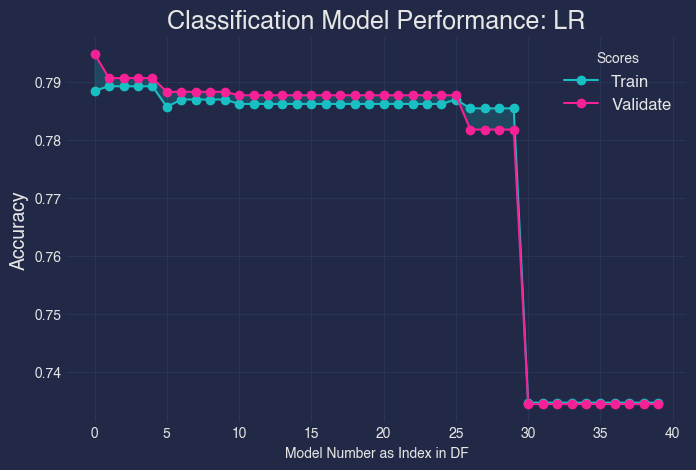

Total Models Ran: 40
Processing Time: 0.84 seconds
--------------------------------
Best LR Hyperparameters:
C=0.1 - lower values help to prevent overfitting
Solver=liblinear - uses coordinate descent to optimize cost function
--------------------------------
Best LR Average Accuracy:
0.79164095155


In [13]:
m.logistic_regression(X_train, y_train, X_validate, y_validate, features)

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

### <font color='#F62196'><i>**Random Forest**</i></font>

<font color='#F62196'>For Random Forest slightly tweaking defaults came out the strongest. Overfitting was realized with more hyperparamters</font>

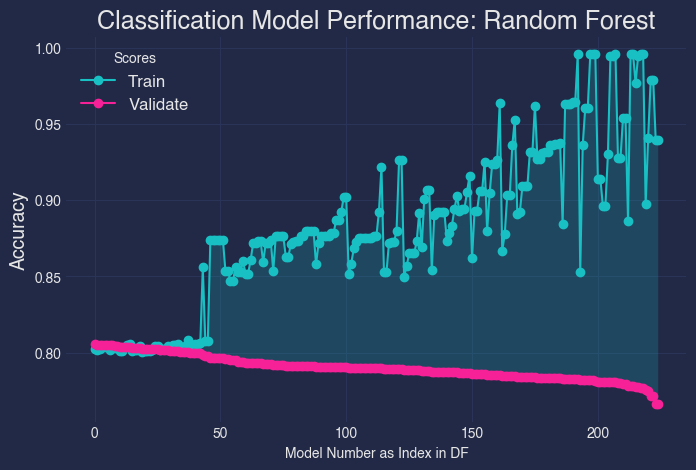

Total Models Ran: 225
Processing Time: 89.76 seconds
--------------------------------
Best Random Forest Hyperparameters:
   n_estimators=10
   max_depth=5
   min_samples_split=2
   min_samples_leaf=2
--------------------------------
Best Random Forest Average Accuracy:
0.8041065071


In [14]:
m.random_forest(X_train, y_train, X_validate, y_validate, features)

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

### <font color='#F62196'><i>**Decision Tree**</i></font>

<font color='#F62196'>Same thing with Decision Tree.</font>

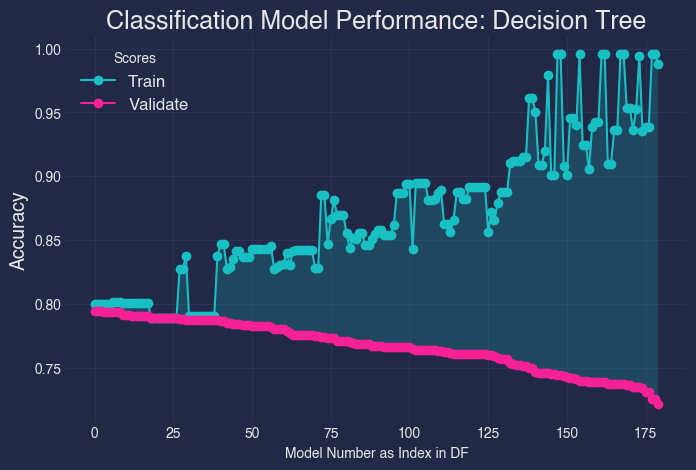

Total Models Ran: 180
Processing Time: 1.42 seconds
--------------------------------
Best Decision Tree Hyperparameters:
('gini', 'best', 5, 2, 4)
--------------------------------
Best Decision Tree Average Accuracy:
0.79705158355


In [15]:
m.decision_tree(X_train, y_train, X_validate, y_validate, features)

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

### <font color='#F62196'><i>**K-Nearest Neighbor**</i></font>

<font color='#F62196'>Once again, same thing with KNN, prone to overfitting.</font>

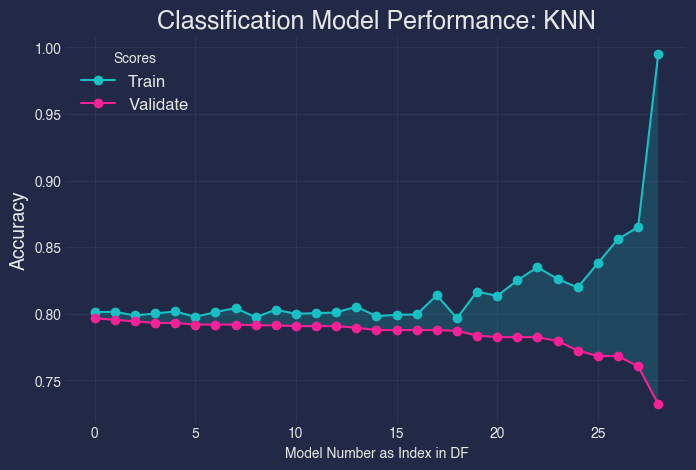

Total Models Ran: 29
Processing Time: 4.15 seconds
--------------------------------
Best KNN Hyperparameters:
KNeighborsClassifier(n_neighbors=26)
--------------------------------
Best KNN Average Accuracy:
0.7988683506500001


In [16]:
m.knn_metrics(X_train, y_train, X_validate, y_validate, features)

<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

### <font color='#F62196'><i>**Random Forest (Test Set)**</i></font>

<font color='#F62196'>Our best RandomForest performed well on the test set at 0.806 and outperformed baseline.</font>

#### Random forest with best hyperparameters we found:

```python  
    RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=2, min_samples_leaf=2)
```

In [17]:
m.best_rfc_test(X_train, y_train, X_test, y_test, features)

Random Forest Model on test set:
Accuracy on Test: 80.62456


<div style="background-color: #212946; padding: 10px; color: #18C0C4;">

## Plan → Acquire → Prepare → Explore → Model → <font color='#F62196'><i>**Deliver**</i></font>

<font color='#F62196'>LR hyperparameters seem the most useful while the others got overtuned quickly. KNN was very easy to use. 

I recommend finding the issues with e_check_payments and fiber_optic internet and would possibly offer tech supper for free or cheaper, since people without it tent to leave.

With more time, we could tune more hyperparameters and identify stronger features.</font>

### **Takeaways and Key Findings**

### **Model Takeaways:**

- LR seems to be harder to overtune
- KNN was very easy to prepare and run
- RandomForest took the longest to run

<br>

- **We identified drivers of `churn`:**

    - `paperless_billing`
    - `internet_service_type`
    - `payment_type`
    - `monthly_charges`
    - `tech_support`

### **Recommendations**

 - identify the issues with `e_check_payments` and `fiber_optic_internet`.

- Possibly offer `tech_support` for free or cheaper. People without it tend to leave.

### **Next Steps**

- Look into the high monthly charges and the contract type to see if more expensive month to month is causing more churn

- Given more time I could check what is causing the high monthly charges that lead to customers churning

- Also with more time, we could run more hyperparamter and feature tuning to potentially get the models over 81% accuracy

### CSV Export

In [18]:
import os

if os.path.isfile('predictions.csv'):
    print('Already exported.')
else:
    import pandas as pd
    import prepare as p
    import model as m
    from sklearn.ensemble import RandomForestClassifier
    df = p.get_telco_data()
    df = p.prep_telco(df)
    df = p.telco_ml(df)
    train, validate, test = p.split_telco(df)
    X_train, y_train, X_validate, y_validate, X_test, y_test = m.create_train_validate_test(train, validate, test, 'churn')

    features = ['monthly_charges',
                'paperless_billing',
                'e_check_payment',
                'fiber_optic_internet',
                'tech_support',
                'senior_citizen',
                'month_to_month_contract',
                'tenure_years',
                'total_charges',
                'monthly_charges',
                'device_protection']

    X_test = X_test[features]

    rf = RandomForestClassifier(
            n_estimators=10,
            max_depth=5,
            min_samples_split=2,
            min_samples_leaf=2,
            random_state=1,
        )
    rf.fit(X_train[features], y_train)

    test_prob = rf.predict_proba(X_test)
    test_pred = rf.predict(X_test)

    y_test = y_test.reset_index().rename(columns={'index': 'customer_id', 0: 'churn'})

    p2 = pd.DataFrame(test_prob).rename(columns={1:'probability_of_churn'}).drop(columns=0)
    p3 = pd.DataFrame(test_pred).rename(columns={0:'prediction_of_churn'})
    pred_df = pd.concat([y_test,p2,p3],axis=1)

    pred_df.drop(columns='churn',inplace=True)

    pred_df.to_csv('predictions.csv', index=False)
    print('Export complete.')

Already exported.
